# **DCGAN - GENERATIVE ADVERSARIAL NETWORKS**

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import matplotlib.pyplot as plt

### **생성자 모델 구축**

In [2]:
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

### **판별자 모델 구축**

In [3]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

### **생성자와 판별자 모델을 연결시키는 GAN 모델 구축**

In [4]:
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         865281    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


### **신경망을 실행시키는 함수 구축**

In [5]:
def gan_train(epoch, batch_size, saving_interval):

  # MNIST 데이터를 loading
  (X_train, _), (_, _) = mnist.load_data()
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):

          discriminator.trainable = True  

          # 실제 데이터를 판별자에 입력
          idx = np.random.randint(0, X_train.shape[0], batch_size)
          imgs = X_train[idx]
          d_loss_real = discriminator.train_on_batch(imgs, true)

          # 가상 이미지를 판별자에 입력
          noise = np.random.normal(0, 1, (batch_size, 100))
          gen_imgs = generator.predict(noise)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

          discriminator.trainable = True
          # 판별자와 생성자의 오차를 계산
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
          g_loss = gan.train_on_batch(noise, true)

          print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 중간 과정 이미지 저장
          if i % saving_interval == 0:
              #r, c = 5, 5
              noise = np.random.normal(0, 1, (25, 100))
              gen_imgs = generator.predict(noise)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("./gan_mnist_%d.png" % i)

### ** 함수 호출**

1/1 [==============================] - 0s 227ms/step
epoch:0  d_loss:0.7146  g_loss:0.5447
1/1 [==============================] - 0s 14ms/step
epoch:1  d_loss:0.5044  g_loss:0.2378
1/1 [==============================] - 0s 13ms/step
epoch:2  d_loss:0.4735  g_loss:0.0772
1/1 [==============================] - 0s 13ms/step
epoch:3  d_loss:0.4946  g_loss:0.0411
1/1 [==============================] - 0s 14ms/step
epoch:4  d_loss:0.4948  g_loss:0.0578
1/1 [==============================] - 0s 19ms/step
epoch:5  d_loss:0.4841  g_loss:0.1266
1/1 [==============================] - 0s 15ms/step
epoch:6  d_loss:0.4419  g_loss:0.2682
1/1 [==============================] - 0s 14ms/step
epoch:7  d_loss:0.4357  g_loss:0.3994
1/1 [==============================] - 0s 14ms/step
epoch:8  d_loss:0.4421  g_loss:0.4939
1/1 [==============================] - 0s 12ms/step
epoch:9  d_loss:0.4411  g_loss:0.5298
1/1 [==============================] - 0s 13ms/step
epoch:10  d_loss:0.4494  g_loss:0.5185
1/1 [===

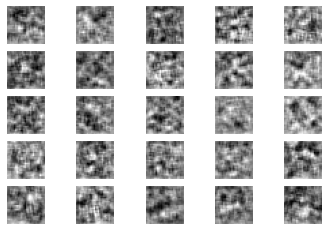

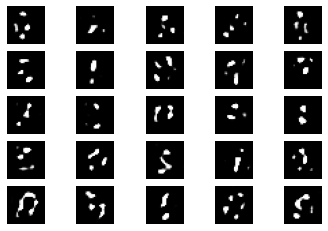

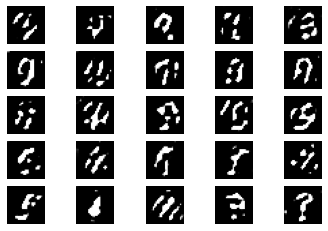

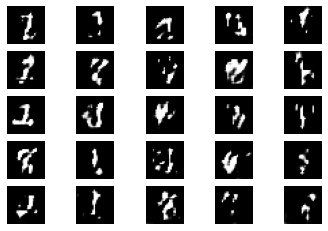

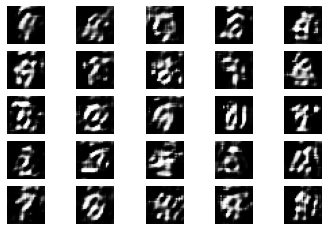

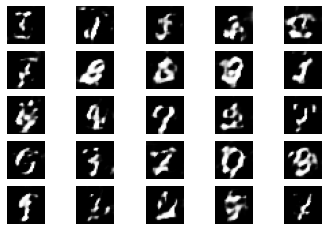

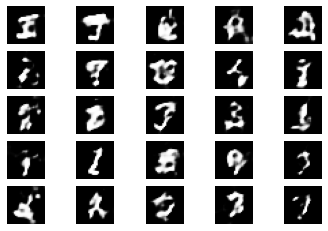

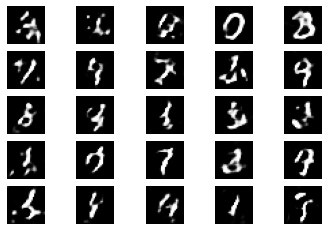

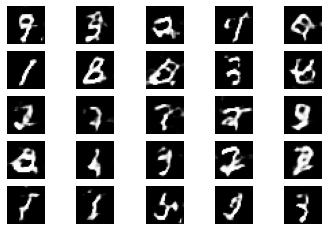

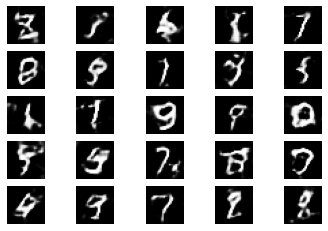

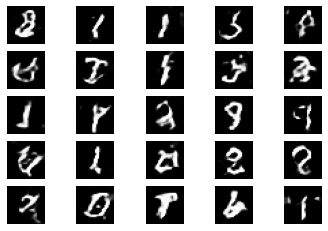

In [6]:
gan_train(2001, 32, 200)